In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Saving text.jpg to text (1).jpg


Saving lena.png to lena (1).png


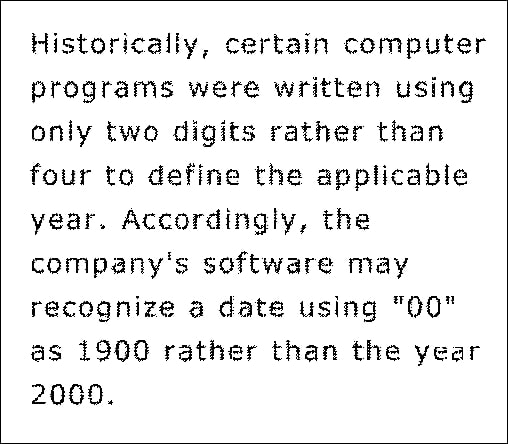

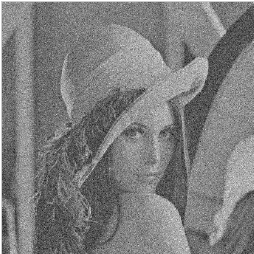

In [3]:
# I1 = cv2.imread('text.jpg', cv2.IMREAD_GRAYSCALE)
# I2 = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# cv2.imshow('image', I1)
# cv2.imshow('image2', I2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

from google.colab import files
myfile = files.upload()
myfile2 = files.upload()

I1 = cv2.imread('text.jpg', cv2.IMREAD_GRAYSCALE)
I2 = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

from google.colab.patches import cv2_imshow 
cv2_imshow(I1)
cv2_imshow(I2)

In [4]:
result1 = np.zeros((I1.shape[0]*2, I1.shape[1]*2), dtype=np.uint8)
result2 = np.zeros((I2.shape[0]*2, I2.shape[1]*2), dtype=np.uint8)

In [25]:
def glpfs(img, D_zero):
    
    # Step2. 입력 이미지의 가로와 세로 2배 길이로 zero padding하세요.
    img_padded = np.pad(img, ((0, img.shape[0]), (0,img.shape[1])), 'constant', constant_values = 0)   # 여기 채워넣기
    
    # Step3. Step2의 결과를 FFT 시키세요 
    f = np.fft.fft2(img_padded)                                                                         # 여기 채워넣기
    
    #Step4. Step3의 결과를 FFT shift 시키세요.
    f_shift = np.fft.fftshift(f)                                                                   # 여기 채워넣기
    
    # Step5. Gaussian Low Pass Filter를 만드세요. 
    P, Q = img_padded.shape
    v = np.linspace(0, P-1, P) # height
    h = np.linspace(0, Q-1, Q) # width
    [X, Y] = np.meshgrid(h, v)                                   

    lpf = np.exp(((X-Q/2)**2+(Y-P/2)**2)/(-2*(D_zero**2)))                                                                       # 여기 채워넣기
    

    # Step6. Step4의 결과와 Low Pass Filter를 곱하세요. 
    mul = f_shift * lpf                                                                       # 여기 채워넣기
    # cv2_imshow(np.abs(f_shift))
    # cv2_imshow(mul)
    
    # Step7. Step6의 결과를 Inverse FFT shift 시키고 Inverse FFT 시키세요.
    if_centered = np.fft.ifftshift(mul)                                                               # 여기 채워넣기
    if_ = np.fft.ifft2(if_centered)                                                                       # 여기 채워넣기
    
    return np.abs(if_)

In [38]:
result1 = np.clip(np.rint(glpfs(I1,75 )), 0, 255)            # 여기 채워넣기
result1 = result1.astype('uint8')

# Step8. Step7의 결과에서 Blur처리된 부분을 crop 
result1 = result1[0:I1.shape[0], 0:I1.shape[1]].copy()
result1_RGB = cv2.cvtColor(result1, cv2.COLOR_GRAY2RGB)

result2 = np.clip(np.rint(glpfs(I2,40 )), 0, 255)           # 여기 채워넣기
result2 = result2.astype('uint8')

# Step8. Step7의 결과에서 Blur처리된 부분을 crop 
result2 = result2[0:I2.shape[0], 0:I2.shape[1]].copy()
result2_RGB = cv2.cvtColor(result2, cv2.COLOR_GRAY2RGB)

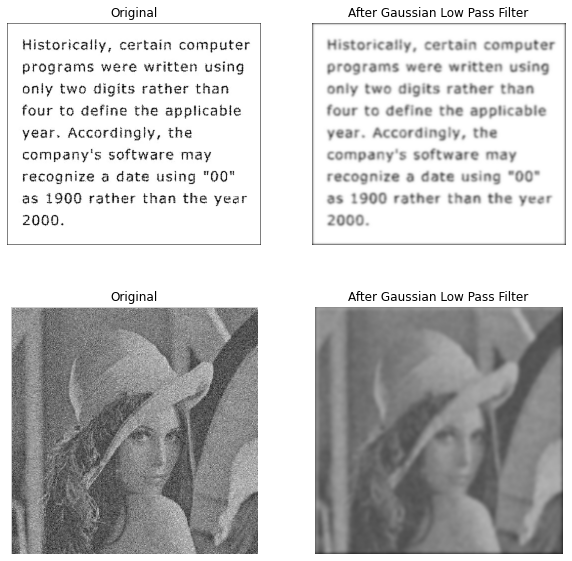

In [40]:
# Plotting해서 결과를 보여주세요.
fig = plt.figure(figsize = (10, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
I1_RGB = cv2.cvtColor(I1, cv2.COLOR_GRAY2RGB)
ax1.imshow(I1_RGB)
ax1.set_title('Original')
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(result1_RGB)
ax2.set_title('After Gaussian Low Pass Filter')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
I2_RGB = cv2.cvtColor(I2, cv2.COLOR_GRAY2RGB)
ax3.imshow(I2_RGB)
ax3.set_title('Original')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(result2_RGB)
ax4.set_title('After Gaussian Low Pass Filter')
ax4.axis("off")

plt.show()